In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
crash = pd.read_csv('Crashes_2009_2018.csv')

In [4]:
sub = ['ACCIDENT_YEAR', 'COLLISION_SEVERITY', 'POINT_X', 'POINT_Y']

In [5]:
crash1 = crash[sub].copy()

In [6]:
crash1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACCIDENT_YEAR       21815 non-null  int64  
 1   COLLISION_SEVERITY  21815 non-null  int64  
 2   POINT_X             21815 non-null  float64
 3   POINT_Y             21815 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 681.8 KB


In [7]:
crash1_geo = gpd.GeoDataFrame(crash1, geometry=gpd.points_from_xy(crash1.POINT_X, crash1.POINT_Y))

<AxesSubplot:>

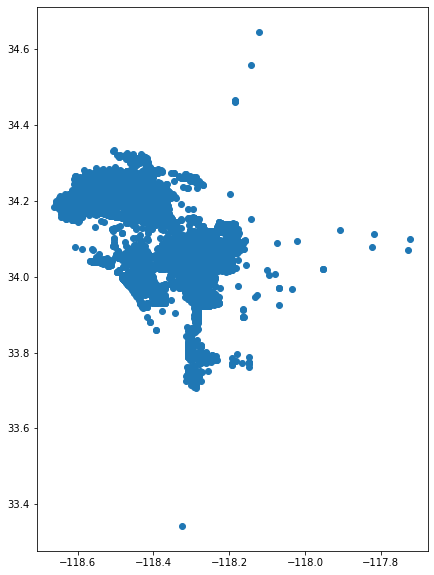

In [8]:
crash1_geo.plot(figsize=(10,10))

In [9]:
neighborhoods = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

In [10]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
neighborhoods.sample(10)

,OBJECTID,name,geometry
81,82,Sepulveda Basin,"POLYGON ((-118.47144 34.16192, -118.47241 34.1..."
69,70,Pacoima,"POLYGON ((-118.41131 34.28981, -118.40915 34.2..."
38,39,Griffith Park,"POLYGON ((-118.30019 34.15791, -118.29884 34.1..."
64,65,Mount Washington,"POLYGON ((-118.21356 34.11627, -118.21207 34.1..."
101,102,Vermont Vista,"POLYGON ((-118.28044 33.92912, -118.28066 33.9..."
93,94,University Park,"POLYGON ((-118.27986 34.01848, -118.28294 34.0..."
91,92,Toluca Lake,"POLYGON ((-118.35717 34.16310, -118.35716 34.1..."
89,90,Sylmar,"POLYGON ((-118.47661 34.33019, -118.47583 34.3..."
78,79,Reseda,"POLYGON ((-118.55822 34.18657, -118.56223 34.1..."
87,88,Sunland,"POLYGON ((-118.29941 34.27623, -118.29954 34.2..."


<AxesSubplot:>

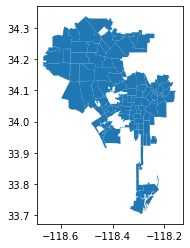

In [13]:
neighborhoods.plot()